# Mission

I wish to implement Roland algorithm for rate change in 8/7 qubit system

## Plan


In [3]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import LH_tools

from importlib import reload 
reload(LH_tools)

<module 'LH_tools' from '/home/oryonatan/qutip/LH_tools.py'>

In [14]:
n = 10
N = 2**n
id_n = tensor([qeye(2)]*n)
psi0 = tensor([basis(2,0)]*n)
psi0= hadamard_transform(n)*psi0
H_0 = id_n-psi0*psi0.trans()
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H_0, psi0)
#display(H_0)

In [5]:
in_state = tensor([basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1)])
#plot_qubism(in_state,legend_iteration=4,figsize=(25, 25));plt.show()

In [6]:
H_1 = id_n - in_state*in_state.trans()
#display(H_1)

In [7]:
h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]

Computation time 53.544954776763916 seconds :
Numeric gap 	= 0.0328404212213 
Theoretical gap = 0.03125
Relative Error	= 0.0508934790826


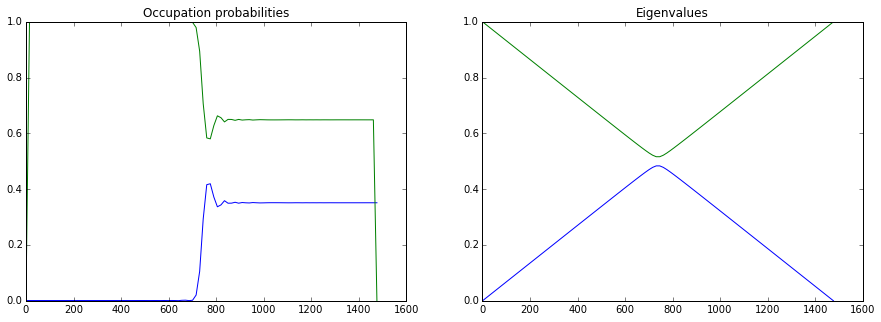

In [318]:
T = 1476
# Speed test
epsilon = 0.1
steps = 100
P_mat,EV_mat,time = LH_tools.benchmark(h_t, in_state, steps=100, T=T)
#Compare theoretical gap to numeric gap

th_gap = np.sqrt(1-4*(1-1/N)*1/4)
nu_gap = LH_tools.find_gap(evals_mat) 
print("Numeric gap \t= %s \nTheoretical gap = %s" %(nu_gap,th_gap))
print("Relative Error\t= %s" % (abs(nu_gap-th_gap)/th_gap))

Computation time 58.646148443222046 seconds :
Numeric gap 	= 0.0633078340238 
Theoretical gap = 0.03125
Relative Error	= 1.02585068876


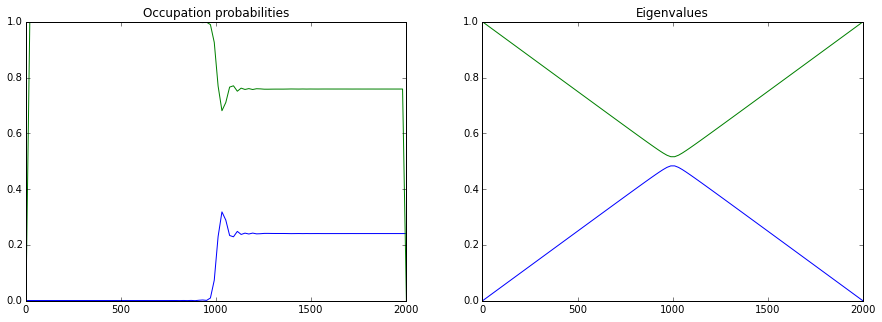

In [254]:
T = 2000
# Speed test
epsilon = 0.1
steps = 100
P_mat,EV_mat,time = LH_tools.benchmark(h_t, in_state, steps=100, T=T)
#Compare theoretical gap to numeric gap
N = 2**n
th_gap = np.sqrt(1-4*(1-1/N)*1/4)
nu_gap = LH_tools.find_gap(evals_mat) 
print("Numeric gap \t= %s \nTheoretical gap = %s" %(nu_gap,th_gap))
print("Relative Error\t= %s" % (abs(nu_gap-th_gap)/th_gap))

Computation time 23.662959337234497 seconds :
Numeric gap 	= 0.0373182113222 
Theoretical gap = 0.03125
Relative Error	= 0.194182762311


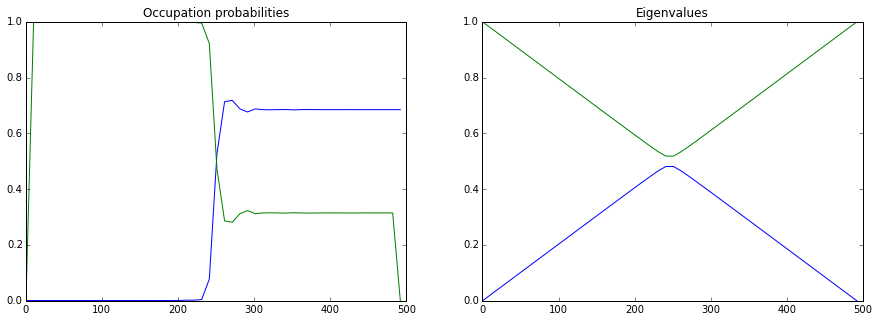

In [72]:
T = 492
# Speed test
epsilon = 0.1
steps = 50
P_mat,EV_mat,time = LH_tools.benchmark(h_t, in_state, steps, T=T)
#Compare theoretical gap to numeric gap
N = 2**n
th_gap = np.sqrt(1-4*(1-1/N)*1/4)
nu_gap = LH_tools.find_gap(EV_mat) 
print("Numeric gap \t= %s \nTheoretical gap = %s" %(nu_gap,th_gap))
print("Relative Error\t= %s" % (abs(nu_gap-th_gap)/th_gap))

# check if 1000 to 3000 is good range for  10 qubit system
if it is : run with jumps of 100 and send mail in the end

In [ ]:
P_per_speed = []
evals_per_speed = []
for speed in range(1000,3000,100):
    tlist = np.linspace(0, speed, 100)
    args = {'t_max': max(tlist)}
    P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
    P_per_speed.append(P_mat)
    evals_per_speed.append(evals_mat)
    

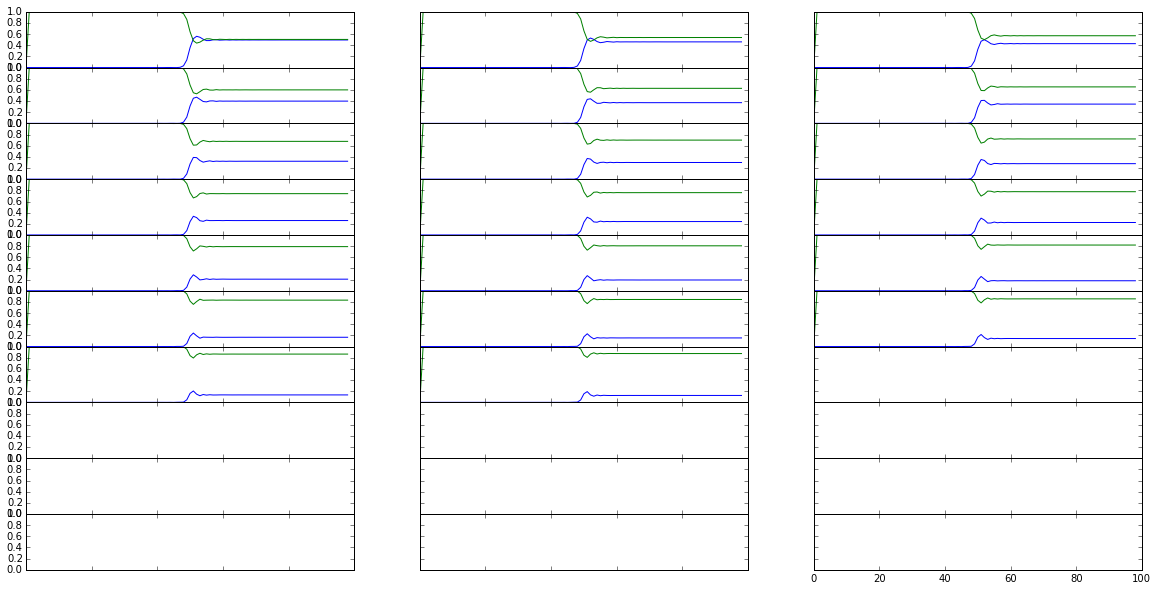

In [261]:
plotarr = []
speed = 0
f, plotarr = plt.subplots(10,3, sharex=True, sharey=True,figsize=(20,10))
try:
    for plot_group in plotarr:
        for plot in plot_group:
            plot.plot(P_per_speed[speed][:-1])
            speed+=1
except IndexError:
    pass # ignore
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.subplots_adjust(hspace=0)

plt.show()
# LH_tools.SendMail("Tests of 10 qubit using linear time",
#                  "From T = 1000 to T= 3000 with 100 jumps",
#                  f)

# Roland

In [10]:
from scipy.optimize import fsolve

def s_function(t ,N = 1024 , epsilon = 0.1 ):
    """Computes the rate function s(t)"""
    nomerator = np.sqrt(N-1) * np.tan((2 * t * epsilon * np.sqrt(N-1)  - N * np.arctan(np.sqrt(N-1)))/ N)
    denominator = 1 - N
    return 1/2*(1 - nomerator / denominator)
def find_s_one (s_function, N, epsilon):
    # We use hinge function to prevent negative solutions
    s_zero = lambda x: max(1 - s_function(x, N , epsilon),2-x)
    # Find closest solution to 0 for 1-s(t)=0
    return fsolve(s_zero,0)[0]

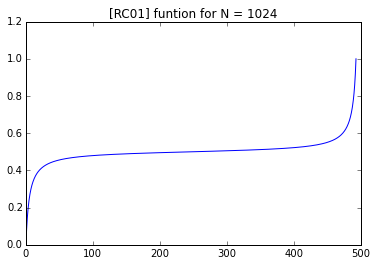

In [158]:

steps = 1000
s_one = find_s_one (s_function, N, epsilon)
# Plot rolands function
plt.plot(np.linspace(0, s_one, steps),s_function(np.linspace(0, s_one, steps) , N, epsilon))
plt.title("[RC01] funtion for N = %s" % N);plt.show()

In [164]:
# Speed test
tlist = np.linspace(0, s_one, steps)
slist = s_function(np.linspace(0, s_one, steps) , N, epsilon)
h_t= [[H_0,'(1-t)'],
      [H_1, 't']]
args = {}
P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False)
LH_tools.plot_PandEV(P_mat,EV_mat,tlist)

TypeError: from_bounds() takes 4 positional arguments but 1002 were given

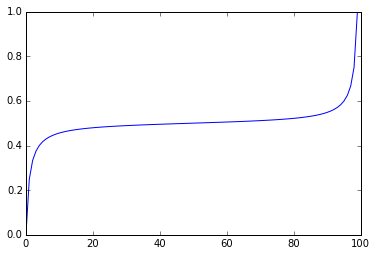

In [276]:
plt.plot(slist)

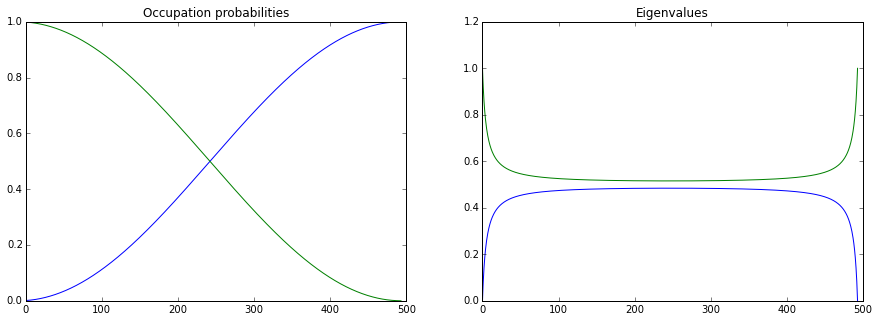

In [167]:
LH_tools.plot_PandEV(P_mat,EV_mat,tlist)

As we can see in the above simulations using while using [RC01] function increase the time spent in the small gap region, the is a gap crossing w.p $\approxeq$ 1.
To fix this we will try strectching the function.

In [11]:
def s_function2(t, rate = 1 ,N = 1024 , epsilon = 0.1 ):
    """Computes the rate function s(t) """
    t = t * rate
    nomerator = np.sqrt(N-1) * np.tan((2 * t * epsilon * np.sqrt(N-1)  - N * np.arctan(np.sqrt(N-1)))/ N)
    denominator = 1 - N
    return 1/2*(1 - nomerator / denominator)

def find_s_one2(s_function, rate =  1 , N = 1024, epsilon = 0.1):
    # We use hinge function to prevent negative solutions
    s_zero = lambda x: max(1 - s_function(x, rate, N , epsilon), 2-x)
    # Find closest solution to 0 for 1-s(t)=0
    return fsolve(s_zero,0)[0]


In [9]:
find_s_one2(s_function2,1/2,1024,0.1)

NameError: name 'fsolve' is not defined

In [311]:
options = Options()
options.nsteps = 10000

/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/integrate/_ode.py:869: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

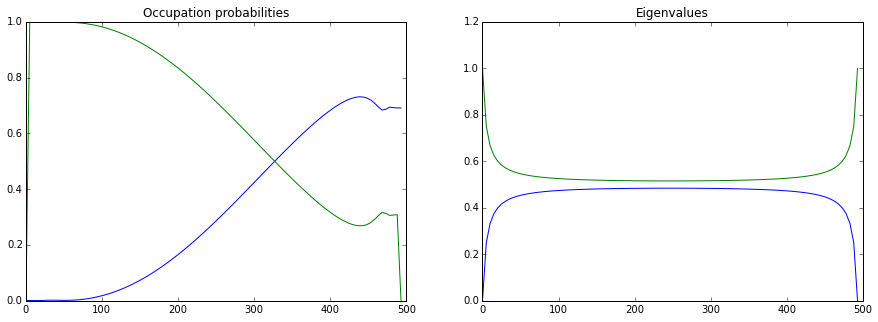

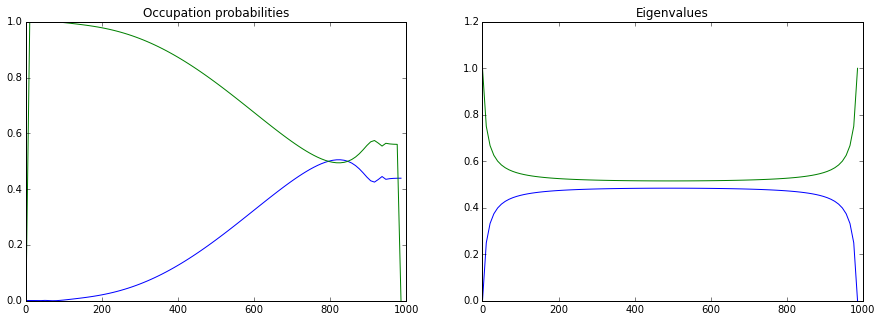

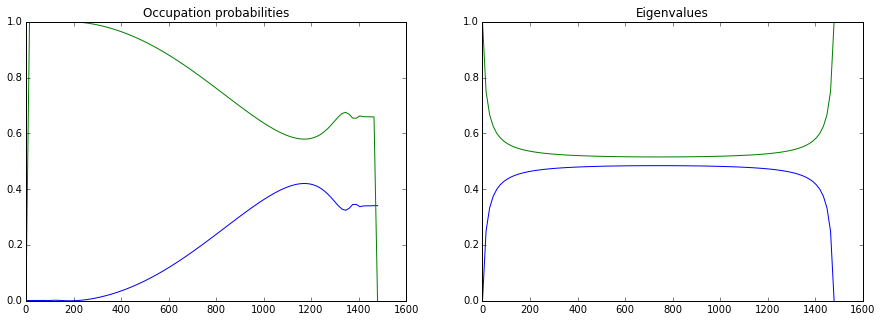

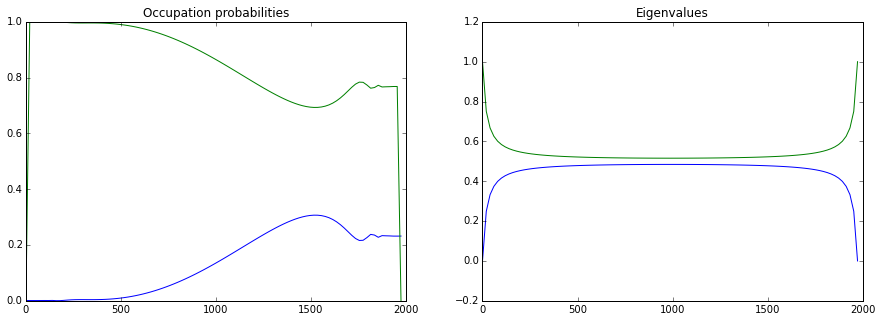

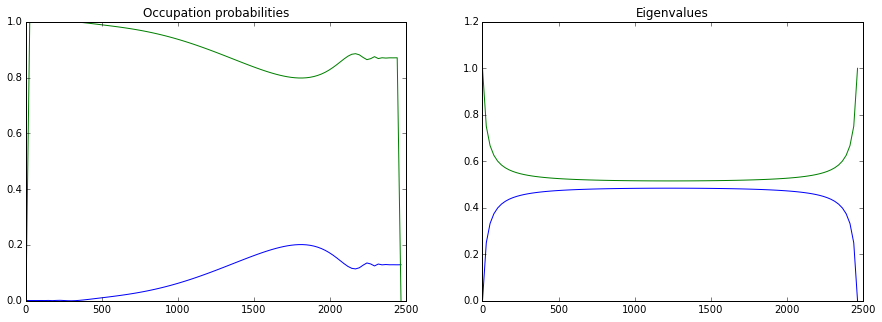

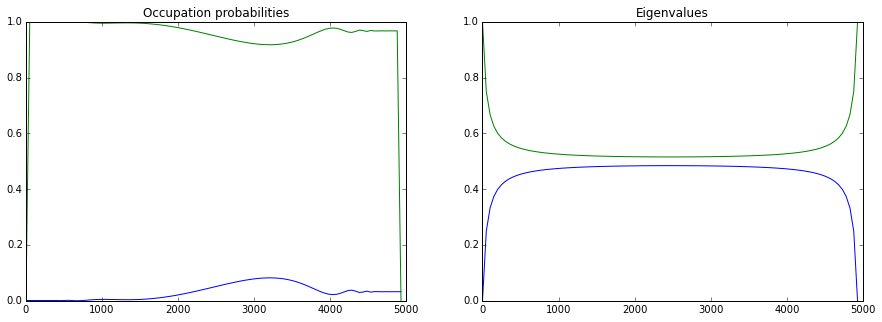

In [313]:
# h_t= [[H_0,'(1-t)'],
#       [H_1, 't']]

options = Options()
options.nsteps = 10000

h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
P_mats = []
EV_mats = []

for rate in (1, 1/2, 1/3 , 1/4, 1/5, 1/10, 1/20, 1/50):
    s_one = find_s_one2(s_function2, rate , N , epsilon)
    tlist = np.linspace(0, s_one, steps)
    slist = s_function2(tlist , rate, N, epsilon) * s_one
    args = {'t_max':s_one}
    P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False, options)
    P_mats.append(P_mat)
    EV_mats.append(EV_mat)
    LH_tools.plot_PandEV(P_mat, EV_mat,tlist)
    

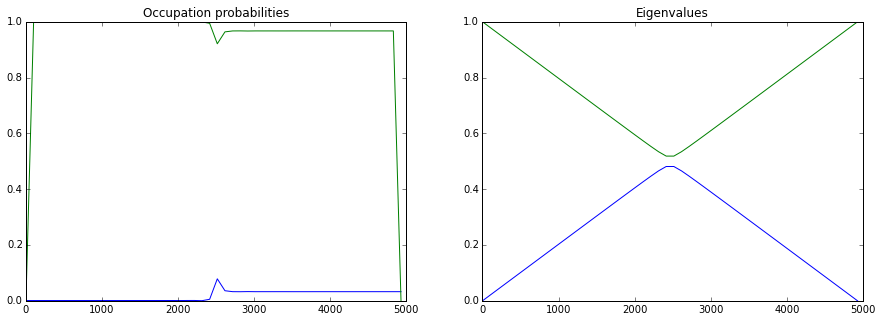

In [83]:
options = Options()
options.nsteps = 100000
steps= 50
epsilon = 0.01
s_one = find_s_one (s_function, N, epsilon)
tlist = np.linspace(0, s_one, steps)

# slist = s_function(np.linspace(0, s_one, steps) , N, epsilon) * s_one
h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
args = {'t_max':s_one}
P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args ,in_state, False,options)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
plt.show()
# LH_tools.SendMail("High nstepes for small epsilon",
#                  """options = Options()
# options.nsteps = 100000
# steps= 50
# epsilon = 0.01
# s_one = find_s_one (s_function, N, epsilon)
# tlist = np.linspace(0, s_one, steps)

# slist = s_function(np.linspace(0, s_one, steps) , N, epsilon) * s_one
# h_t= [[H_0,'(t_max-t)/t_max'],
#       [H_1, 't/t_max']]
# args = {'t_max':s_one}
# P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False,options)
# f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
# plt.show()
#                  """,
#                  f)

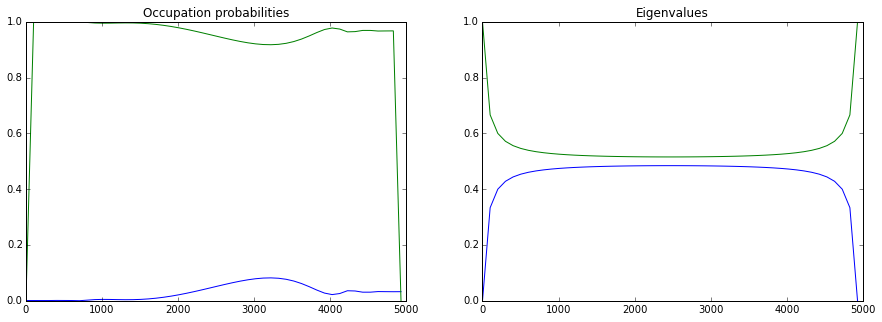

In [82]:
options = Options()
options.nsteps = 100000
steps= 50
epsilon = 0.01
s_one = find_s_one (s_function, N, epsilon)
tlist = np.linspace(0, s_one, steps)

slist = s_function(np.linspace(0, s_one, steps) , N, epsilon) * s_one
h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
args = {'t_max':s_one}
P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False,options)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
plt.show()
LH_tools.SendMail("High nstepes for small epsilon",
                 """options = Options()
options.nsteps = 100000
steps= 50
epsilon = 0.01
s_one = find_s_one (s_function, N, epsilon)
tlist = np.linspace(0, s_one, steps)

slist = s_function(np.linspace(0, s_one, steps) , N, epsilon) * s_one
h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
args = {'t_max':s_one}
P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False,options)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
plt.show()
                 """,
                 f)

In [70]:
s_one

492.89392590302828

In [75]:
np.pi*np.sqrt(N)/0.2

502.6548245743669

In [76]:
0.03125**2

0.0009765625